# T81-558: Applications of Deep Neural Networks
**Module 6: Convolutional Neural Networks (CNN) for Computer Vision**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module 6 Material

* **Part 6.1: Image Processing in Python** [[Video]](https://www.youtube.com/watch?v=4Bh3gqHkIgc&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_1_python_images.ipynb)
* Part 6.2: Keras Neural Networks for Digits and Fashion MNIST [[Video]](https://www.youtube.com/watch?v=-SA8BmGvWYE&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_2_cnn.ipynb)
* Part 6.3: Implementing a ResNet in Keras [[Video]](https://www.youtube.com/watch?v=qMFKsMeE6fM&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_3_resnet.ipynb)
* Part 6.4: Using Your Own Images with Keras [[Video]](https://www.youtube.com/watch?v=VcFja1fUNSk&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_4_keras_images.ipynb)
* Part 6.5: Recognizing Multiple Images with YOLO Darknet [[Video]](https://www.youtube.com/watch?v=oQcAKvBFli8&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN) [[Notebook]](t81_558_class_06_5_yolo.ipynb)

In [1]:
# Nicely formatted time string
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

# Part 6.1: Image Processing in Python

We will make use of images to demonstrate auto encoders.  To use images in Python, we will make use of the Pillow package.  This package can be installed with the following command.  

```
pip install pillow
```

The following program uses Pillow to load and display an image.

[[[ 86 133 177]
  [ 85 132 176]
  [ 84 133 176]
  ...
  [ 94 128 153]
  [ 91 128 155]
  [ 94 129 169]]

 [[ 86 133 177]
  [ 88 135 179]
  [ 88 137 180]
  ...
  [ 96 133 159]
  [ 92 136 165]
  [ 99 141 183]]

 [[ 83 130 174]
  [ 87 134 178]
  [ 89 138 181]
  ...
  [108 150 175]
  [100 149 179]
  [ 97 144 186]]

 ...

 [[127  77  76]
  [131  81  80]
  [128  80  76]
  ...
  [  4  10  10]
  [  2  11  10]
  [  2  11  10]]

 [[132  81  77]
  [129  80  75]
  [124  75  70]
  ...
  [  4  10  10]
  [  3  12  11]
  [  3  12  11]]

 [[140  90  83]
  [137  87  80]
  [130  81  74]
  ...
  [ 11  17  17]
  [ 10  19  18]
  [ 10  19  18]]]


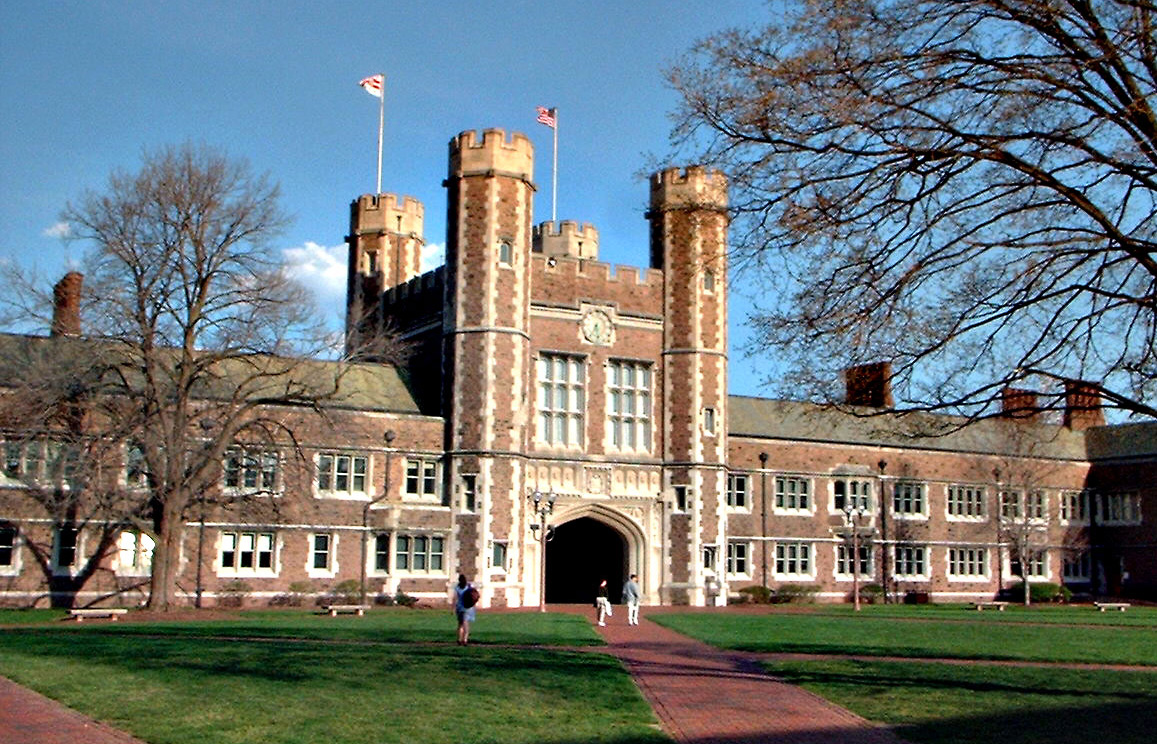

In [2]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np

%matplotlib inline

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

print(np.asarray(img))

img

### Creating Images (from pixels) in Python

Pillow can also be used to create an image from a 3D numpy cube.  The rows and columns specify the pixels.  The depth, of 3, specifies red, green and blue.  Here a simple image is created.

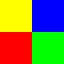

In [3]:
from PIL import Image
import numpy as np

w, h = 64, 64
data = np.zeros((h, w, 3), dtype=np.uint8)

# Yellow
for row in range(32):
    for col in range(32):
        data[row,col] = [255,255,0]
        
# Red
for row in range(32):
    for col in range(32):
        data[row+32,col] = [255,0,0]
        
# Green
for row in range(32):
    for col in range(32):
        data[row+32,col+32] = [0,255,0]        
        
# Blue
for row in range(32):
    for col in range(32):
        data[row,col+32] = [0,0,255]                
        

img = Image.fromarray(data, 'RGB')
img

### Transform Images in Python (at the pixel level)

We can combine the last two programs and modify images.  Here we take the mean color of each pixel and form a grayscale image.

Rows: 744, Cols: 1157


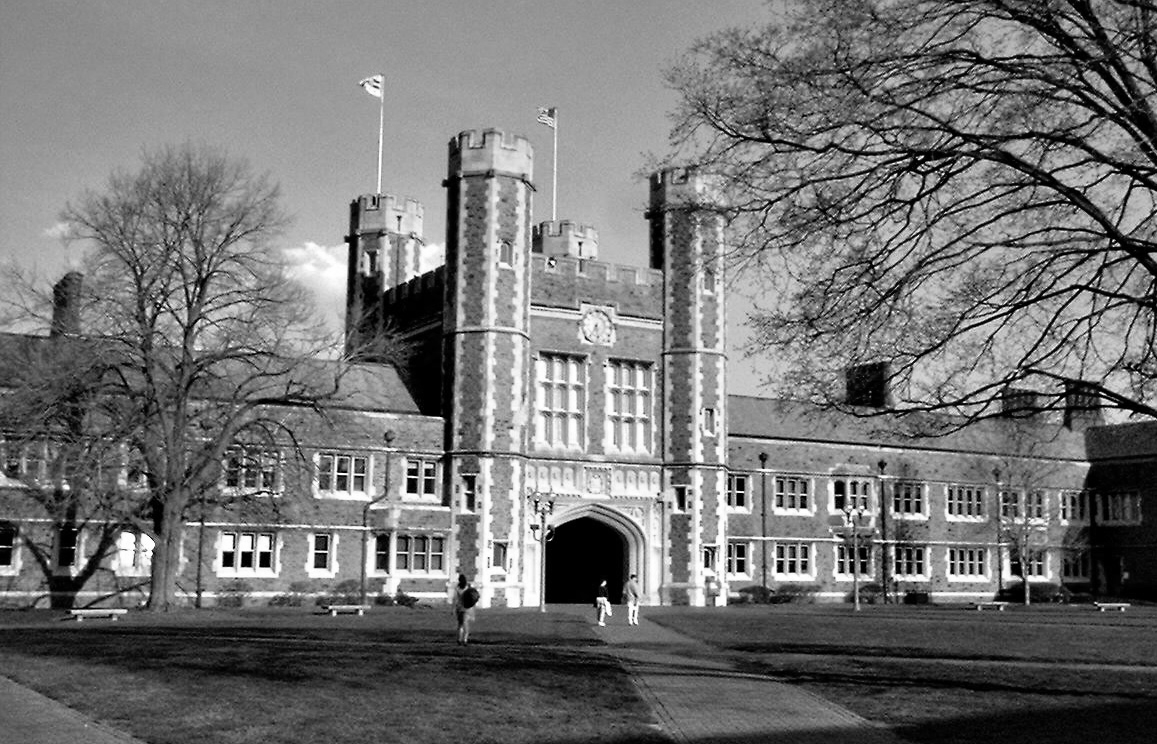

In [4]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"
#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = np.zeros((rows, cols, 3), dtype=np.uint8)
for row in range(rows):
    for col in range(cols):
        t = np.mean(img_array[row,col])
        img2_array[row,col] = [t,t,t]

img2 = Image.fromarray(img2_array, 'RGB')
img2  

# Standardize Images

When processing several images together it is sometimes important to standardize them.  The following code reads a sequence of images and causes them to all be of the same size and perfectly square.  If the input images are not square, cropping will occur.

https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg


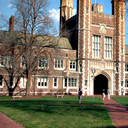

https://upload.wikimedia.org/wikipedia/commons/f/ff/WashU_Graham_Chapel.JPG


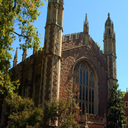

https://upload.wikimedia.org/wikipedia/commons/9/9e/SeigleHall.jpg


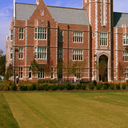

https://upload.wikimedia.org/wikipedia/commons/a/aa/WUSTLKnight.jpg


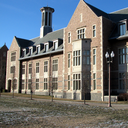

https://upload.wikimedia.org/wikipedia/commons/3/32/WashUABhall.jpg


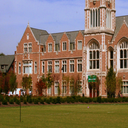

https://upload.wikimedia.org/wikipedia/commons/c/c0/Brown_Hall.jpg


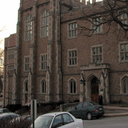

https://upload.wikimedia.org/wikipedia/commons/f/f4/South40.jpg


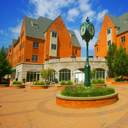

(7, 49152)


In [5]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

images = [
    "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/ff/WashU_Graham_Chapel.JPG",
    "https://upload.wikimedia.org/wikipedia/commons/9/9e/SeigleHall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/a/aa/WUSTLKnight.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/3/32/WashUABhall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/c/c0/Brown_Hall.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/f/f4/South40.jpg"    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
    
x = [] 
    
for url in images:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    print(url)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
    x.append(img_array)
    

x = np.array(x)

print(x.shape)


### Adding Noise to an Image

Auto encoders can handle noise.  First it is important to see how to add noise to an image.  There are many ways to add such noise.  The following code adds random black squares to the image to produce noise.

Rows: 744, Cols: 1157
(744, 1157, 3)


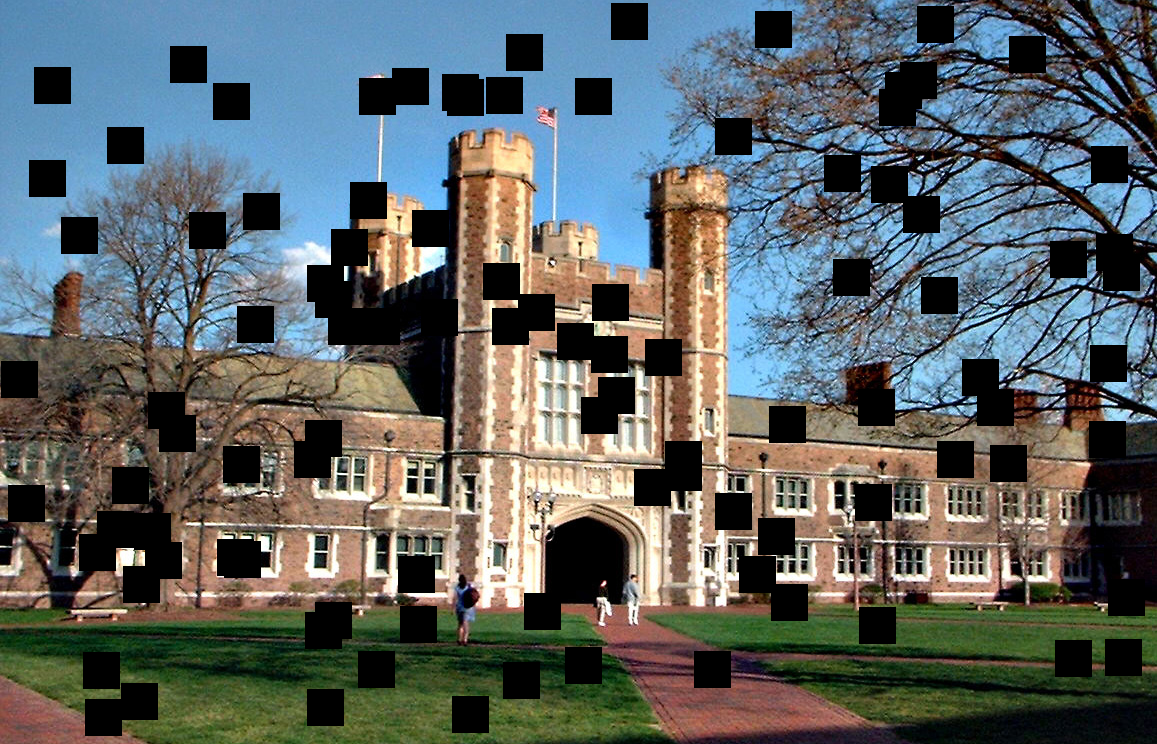

In [6]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline


def add_noise(a):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/20) # size of spot is 1/20 of smallest dimension
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

url = "https://upload.wikimedia.org/wikipedia/commons/9/92/Brookings.jpg"
#url = "http://www.heatonresearch.com/images/about-jeff.jpg"

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = img_array.astype(np.uint8)
print(img2_array.shape)
img2_array = add_noise(img2_array)
img2 = Image.fromarray(img2_array, 'RGB')
img2        
        

# Module 6 Assignment

You can find the first assignment here: [assignment 6](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/assignments/assignment_yourname_class1.ipynb)